# Tarea 3 | Análisis de Datos en Python | Magíster en Ciencias de Datos UC
### Luciano Davico

# Desarrollo

Primero importaremos los datos

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt 

In [5]:
df = pd.read_excel("datos/Tarea3.xlsx", sheet_name="Tarea3")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  famrel      395 non-null    int64 
 16  freetime    395 non-null    int64 
 17  goout       395 non-null    int64 
 18  Dalc        395 non-null    int64 
 19  Walc        395 non-null    int64 
 20  health    

In [7]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3'],
      dtype='object')

# Pregunta 1
¿Cuál es la correlación entre ausencias (absences) a clases de un estudiante y las demás 
variables numéricas de las bases de datos? ¿Alguna de estas correlaciones es importante?

# Respuesta

Calculamos la matriz de correlaciones en el dataset con el que contamos.

In [8]:
corr = df.corr()
corr

/var/folders/5x/tlp5fd614dv9y_wn8nmtqv4rqq_frn/T/ipykernel_21671/2438084875.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


Filtramos en el índice solo por las ausencias.

In [9]:
corr_absences = corr['absences']
corr_absences

age           0.175230
Medu          0.100285
Fedu          0.024473
traveltime   -0.012944
studytime    -0.062700
failures      0.063726
famrel       -0.044354
freetime     -0.058078
goout         0.044302
Dalc          0.111908
Walc          0.136291
health       -0.029937
absences      1.000000
G1           -0.031003
G2           -0.031777
G3            0.034247
Name: absences, dtype: float64

Podemos ver que las variables *age* (Edad), *Medu* (Grado de educación de la madre), *Dalc* (Consumo de alcohol en días de semana), *Walc* (Consumo de alcohol en fin de semana) tienen una correlación un poco más relevante, positiva, siendo esta mayor a 0.1. De todas maneras, esto no es un valor cercano a 1 en términos absolutos, por lo cual no se podría decir que hay una correlación importante a fijarse con particularidad.

# Pregunta 2
¿El promedio de ausencias es diferente según al tipo de escuela en la que estudia el 
estudiante? ¿y con respecto al género del estudiante?

# Respuesta

En primer lugar, debemos mirar el dataset más agregadamente. En particular, tenemos que agrupar por el tipo de escuela del estudiante y por su género. Luego, calcular el promedio por cada uno de los valores de la categoría agregada. Podemos crear una tabla pivote que agrupe ambos datos

In [10]:
# Agregamos por escuela
school_agg_df = df[['school', 'absences']].groupby('school').agg('mean')[['absences']]
school_agg_df.rename(index={'GP': 'Gabriel Pereira', 'MS': 'Mousinho da Silveira'}, columns={'absences': 'absences_mean'}, inplace=True)
school_agg_df

,absences_mean
school,
Gabriel Pereira,5.965616
Mousinho da Silveira,3.760870


Vemos que el promedio de ausencias sí es diferente según esta, siendo la escuela **Gabriel Pereira la que tiene mayor promedio de ausencias**.

In [11]:
# Agregamos por genero
sex_agg_df = df[['sex', 'absences']].groupby('sex').agg('mean')[['absences']]
sex_agg_df.rename(columns={'absences': 'absences_mean'}, inplace=True)
sex_agg_df

,absences_mean
sex,
F,6.216346
M,5.144385


Respecto al género, el promedio de ausencias también cambia según este, siendo el **sexo femenino el que tiene mayor promedio de ausencias**.

Como complemento, también es interesante ver una matriz de promedio de ausencia por escuela y género, lo que obtenemos con una tabla pivote.

In [12]:
school_sex_agg_df = pd.pivot_table(df, columns='sex', index='school', values='absences', aggfunc='mean')
school_sex_agg_df.rename(index={'GP': 'Gabriel Pereira', 'MS': 'Mousinho da Silveira'}, inplace=True)
school_sex_agg_df

sex,F,M
school,,
Gabriel Pereira,6.639344,5.222892
Mousinho da Silveira,3.120000,4.523810


Vemos que en la escuela Gabriel Pereira tiene efectivamente mayor promedio de ausencia tanto en hombres como mujeres. Sin embargo, el promedio de ausencia de hombres es mayor en la escuela Mousinho da Silveira, contrariando lo expuesto anteriormente.

# Pregunta 3
Considere que el indicador que quiere observar es si un estudiante asistió al colegio todos 
los días de clases. ¿Cómo queda la tabla de frecuencia de este indicador con respecto a los 
años de educación de la mamá (Medu) y los años de educación del papá del estudiante 
(Fedu)? ¿Hay alguna asociación que parezca importante? (Lo que se debe contar como 
frecuencia es la cantidad de estudiantes que no faltaron ningún día a clases). 

# Respuesta

En primer lugar, hacemos un filtro por estudiantes que asistieron todos los días, es decir, que tienen *absences* igual a 0.

In [13]:
no_absences_df = df[df['absences'] == 0]
no_absences_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15
10,GP,F,15,U,GT3,T,4,4,teacher,health,...,3,3,3,1,2,2,0,10,8,9
14,GP,M,15,U,GT3,A,2,2,other,other,...,4,5,2,1,1,3,0,14,16,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,MS,M,19,R,GT3,T,1,1,other,services,...,4,3,2,1,3,5,0,6,5,0
387,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,0,7,5,0
388,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,0,7,9,8
389,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,0,6,5,0


Ahora, agrupamos por años de educación de la madre y del padre el dataset filtrado por no ausencias.

In [14]:
no_absences_df.groupby('Medu').agg('count')[['absences']].reset_index()

,Medu,absences
0,0,2
1,1,16
2,2,31
3,3,30
4,4,36


In [15]:
medu_grouped_df = no_absences_df.groupby('Medu').agg('count')[['absences']].reset_index()
medu_grouped_df.rename(columns={'Medu': "Mother's educational level", 'absences': 'Total assistance M'}, inplace=True)
medu_grouped_df

,Mother's educational level,Total assistance M
0,0,2
1,1,16
2,2,31
3,3,30
4,4,36


Similarmente, agrupamos por el padre.

In [16]:
fedu_grouped_df = no_absences_df.groupby('Fedu').agg('count')[['absences']].reset_index()
fedu_grouped_df.rename(columns={'Fedu': "Father's educational level", 'absences': 'Total assistance F'}, inplace=True)
fedu_grouped_df

,Father's educational level,Total assistance F
0,1,22
1,2,34
2,3,26
3,4,33


In [17]:
# Agregamos el dato de 0 estudiantes cuando el nivel educacional es 0
fedu_grouped_df = fedu_grouped_df.append({"Father's educational level": 0, 'Total assistance F': 0}, ignore_index=True).sort_values("Father's educational level")
fedu_grouped_df.reset_index(inplace=True)
fedu_grouped_df.drop('index', axis=1, inplace=True)
fedu_grouped_df

/var/folders/5x/tlp5fd614dv9y_wn8nmtqv4rqq_frn/T/ipykernel_21671/3946034923.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fedu_grouped_df = fedu_grouped_df.append({"Father's educational level": 0, 'Total assistance F': 0}, ignore_index=True).sort_values("Father's educational level")


,Father's educational level,Total assistance F
0,0,0
1,1,22
2,2,34
3,3,26
4,4,33


Podemos ver una cierta tendencia de que, a mayor cantidad de años de estudio de los padres, mayor cantidad de asistencias tienen los estudiantes. Incluso, podemos ver que todos los estudiantes que asistieron al menos una vez, su padre tiene al menos un nivel 1 de años de educación, equivalente a educación primaria hasta 4to grado.

<Axes: xlabel="Mother's educational level">

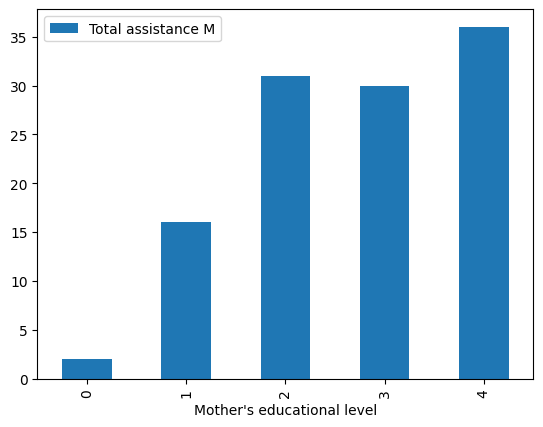

In [18]:
medu_grouped_df.plot(x="Mother's educational level", y='Total assistance M', kind='bar')

<Axes: xlabel="Father's educational level">

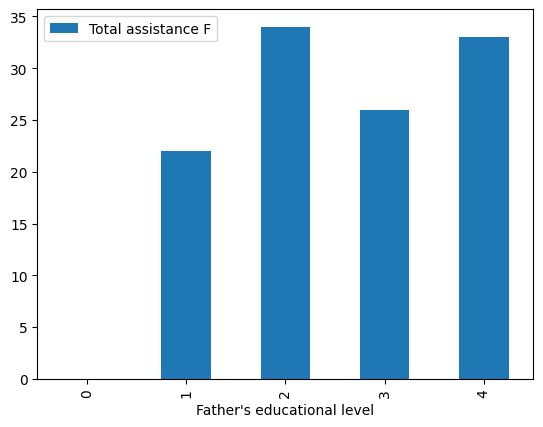

In [19]:
fedu_grouped_df.plot(x="Father's educational level", y='Total assistance F', kind='bar')

In [20]:
result = pd.concat([medu_grouped_df, fedu_grouped_df], axis=1)
result.drop("Father's educational level", axis=1, inplace=True)
result.rename(columns={
    "Mother's educational level": "Educational level"}, inplace=True)
result

,Educational level,Total assistance M,Total assistance F
0,0,2,0
1,1,16,22
2,2,31,34
3,3,30,26
4,4,36,33


In [21]:
fig = px.bar(result, x = "Educational level", y =['Total assistance F','Total assistance M'],
    title = 'Asistencia según nivel educacional de Padre y Madre')
fig.show()

# Pregunta 4
A través de un gráfico boxplot indique qué tan distinta es la calificación en primer grado (G1 
que va de 0 a 20) de los estudiantes dependiendo de quién es su tutor (guardian).

# Respuesta

Utilizando la librería seaborn, graficamos la distribución estadística de las calificaciones según el tipo de guardián.

<Axes: xlabel='guardian', ylabel='G1'>

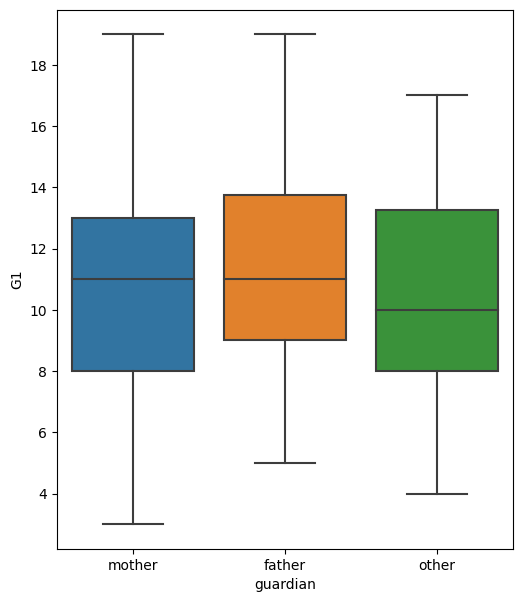

In [37]:
fig_4 = plt.figure(figsize=(20,7))
ax = fig_4.add_subplot(131)

sns.boxplot(data=df,y='G1',x='guardian', ax=ax)

# Pregunta 5
Haga un gráfico de dispersión que tenga en el eje “y” la calificación en el segundo grado 
(G2), en el eje “x” esté el tiempo de viaje (traveltime) y en el gráfico el tamaño del punto 
(x,y) esté dado por la cantidad de estudiantes con esa combinación. Al observar el resultado 
de este gráfico, ¿ve alguna asociación interesante de explicar?

# Respuesta

Primero, guardamos todas las combinaciones de traveltime y G2 que encontramos en nuestro dataframe.

In [45]:
def combine_traveltime_g2(row_travel, row_g2):
    return f'{row_travel}-{row_g2}'

df['traveltime_g2'] = df.apply(lambda x: combine_traveltime_g2(x['traveltime'], x['G2']), axis=1)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,traveltime_g2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,2-6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,1-5
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,1-8
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,1-14
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,1-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,4,4,5,4,11,9,9,9,1-9
391,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,3,14,16,16,2-16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,3,3,3,3,3,10,8,7,1-8
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,1,3,4,5,0,11,12,10,3-12


Calculamos la frecuencia de cada combinación y la guardamos en una columna.

In [57]:
combs = df.groupby('traveltime_g2')['school'].count().index
values = df.groupby('traveltime_g2')['school'].count().values
combination_values = dict(zip(combs, values))

def get_combination_frec(row, dict_mapper):
    return dict_mapper[row]

df['traveltime_g2_frec'] = df.apply(lambda x: get_combination_frec(x['traveltime_g2'], combination_values), axis=1)
df


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,traveltime_g2,traveltime_g2_frec
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,2-6,5
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,1-5,9
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,1-8,20
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,1-14,19
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,1-10,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,4,4,5,4,11,9,9,9,1-9,31
391,MS,M,17,U,LE3,T,3,1,services,services,...,5,3,4,2,3,14,16,16,2-16,6
392,MS,M,21,R,GT3,T,1,1,other,other,...,3,3,3,3,3,10,8,7,1-8,20
393,MS,M,18,R,LE3,T,3,2,services,other,...,1,3,4,5,0,11,12,10,3-12,5


Finalmente, graficamos la dispersión segun el tiempo de viaje, las notas G2 y el tamaño de cada punto se determina por la combinación de ambas dos variables. 
Para lo anterior, utilizaremos el método plot de la misma librería pandas, combinados con matplotlib.

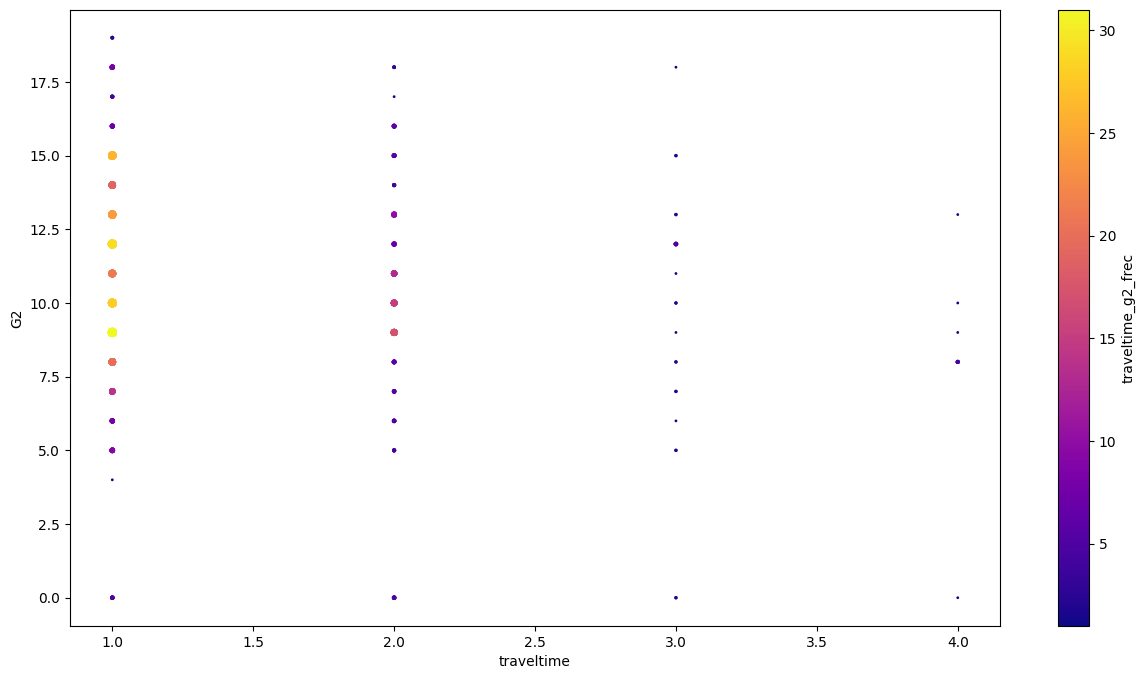

In [59]:
df.plot.scatter(x='traveltime', y='G2', s='traveltime_g2_frec', c='traveltime_g2_frec', colormap='plasma', figsize=(15,8))
plt.show()

Algunas observaciones que se pueden desprender del gráfico.

* Vemos que, independientemente del tiempo de viaje, las notas tienden a tener una mayor frecuencia en rangos cercanos a la mitad del total de nota que se puede obtener.
* Por otro lado, considerando que la distribución de las notas independientemente del tiempo de viaje es similar, vemos que hay mas datos para un tiempo de viaje mas corto y en dichos casos, se puede ver una ligera prevalencia de mejores notas a medida que el tiempo de viaje es menor, ya que a menor tiempo de viaje se ven puntos un poco más grandes en tamaños de G2 más altos.
* Dado lo anterior, podríamos concluir que el tener tiempos de viaje cortos para llegar a los establecimientos educacionales podría influir, en baja medida, positivamente en las notas de los alumnos.
* Considerando los datos anteriores, se podría concluir que puede existir una correlación negativa entre tiempos de viaje largos y buenas notas en G2, pero mas o menos cercana a 0 (negativamente).

Solo para ilustrar lo respecto a la correlación anterior, confirmamos el dato.

In [62]:
df[['traveltime', 'G2']].corr()['traveltime']['G2']

-0.1531979633172173